In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
import anndata

In [8]:
adata = anndata.read_mtx('GSE104556/GSE104556_matrix.mtx.gz')

In [19]:
adata = adata.T

In [20]:
ls GSE104556

GSE104556_barcodes.tsv.gz  GSE104556_matrix.mtx.gz
GSE104556_genes.tsv.gz


In [21]:
adata.obs.index = pd.read_csv('GSE104556/GSE104556_barcodes.tsv.gz', header=-1, index_col=0).index

In [27]:
adata.var = pd.read_csv('GSE104556/GSE104556_genes.tsv.gz', header=-1, index_col=0, sep='\t', names=['gene_name'])

In [31]:
import DCA.api as dca

Using TensorFlow backend.


In [32]:
res = dca.autoencode(adata)

### Autoencoder: Successfully preprocessed 51868 genes and 2552 cells.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
count (InputLayer)              (None, 27790)        0                                            
__________________________________________________________________________________________________
enc0 (Dense)                    (None, 64)           1778624     count[0][0]                      
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64)           192         enc0[0][0]                       
__________________________________________________________________________________________________
enc0_act (Activation)           (None, 64)           0           batch_normalization_1[0][0]      
______________________________________

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [34]:
YY = tsne.fit_transform(res.obsm['X_dca_hidden'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2552 samples in 0.003s...
[t-SNE] Computed neighbors for 2552 samples in 0.134s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2552
[t-SNE] Computed conditional probabilities for sample 2000 / 2552
[t-SNE] Computed conditional probabilities for sample 2552 / 2552
[t-SNE] Mean sigma: 0.767062
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.977058
[t-SNE] Error after 1000 iterations: 0.585647


In [35]:
res.obs['TSNE_1'] = YY[:, 0]
res.obs['TSNE_2'] = YY[:, 1]

In [36]:
import plotnine as p

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


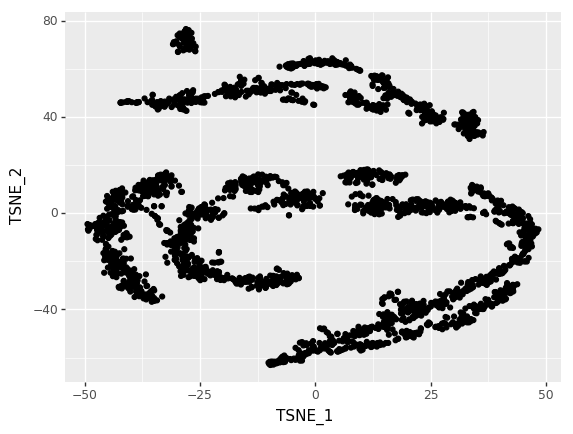

<ggplot: (337891297)>

In [37]:
p.qplot('TSNE_1', 'TSNE_2', res.obs)

In [38]:
res

AnnData object with n_obs × n_vars = 2552 × 27790 
    obs_keys = ['DCA_split', 'n_counts', 'size_factors', 'TSNE_1', 'TSNE_2']
    var_keys = ['gene_name', 'n_counts']
    uns_keys = ['DCA_losses']
    obsm_keys = ['X_dca', 'X_dca_mean', 'X_dca_hidden', 'X_dca_dropout', 'X_dca_dispersion']

In [42]:
res.obs['batch'] = res.obs.index.str.get(-1)

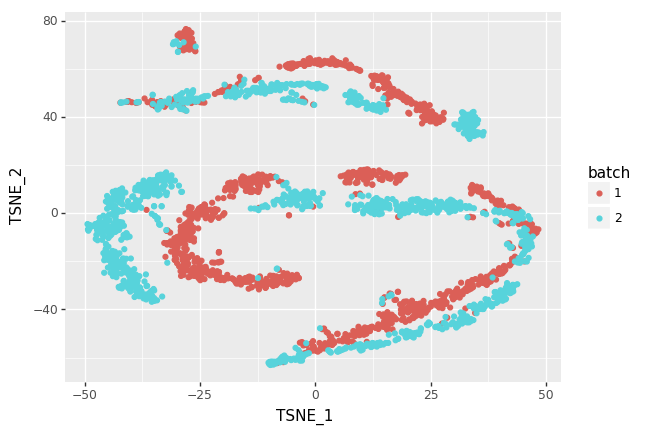

<ggplot: (346325722)>

In [75]:
p.qplot('TSNE_1', 'TSNE_2', res.obs, color='batch')

In [74]:
res.obs[['TSNE_1', 'TSNE_2', 'batch']].to_csv('DCA_Lukassen_results.csv')